# Predicting the value of UKRI grants to an institution based on its league table scores.
- Both the institute rankings and the UKRI spending is imported from the github repository.
- NaN values are replaced using nearest neighbours interpolation.
- An initial investigation into this data is run before some scikit-learn models are compared to traditional regression models for predicting the grant value.
N.B. A Neural Network model would not be valid with such a small dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
github_data_url = "https://github.com/md12g12/ML_UK_university_funding_project/blob/main/funding_ML_df.csv?raw=true"

uni_df = pd.read_csv(github_data_url, index_col=[0])

In [3]:
uni_df.head()

Overall score  Entry standards  \
oxford                                           1000              200   
cambridge                                         989              205   
school economics and political science            963              177   
st andrews                                        947              208   
imperial                                          895              194   

                                        Student satisfaction  \
oxford                                                   NaN   
cambridge                                                NaN   
school economics and political science                  3.98   
st andrews                                              4.30   
imperial                                                3.99   

                                        Research quality  Research intensity  \
oxford                                              3.34                0.87   
cambridge                                           3.33                0.95   
school economics and political science              3.35                0.85   
st andrews                                          3.13                0.82   
imperial                                            3.36                0.92   

                                        Academic services spend  \
oxford                                                     2842   
cambridge                                                  2718   
school economics and political science                     2051   
st andrews                                                 2650   
imperial                                                   2982   

                                        Facilities spend  Degree completion  \
oxford                                               599               99.1   
cambridge                                           1043               99.1   
school economics and political science               853               96.5   
st andrews                                           746               95.7   
imperial                                             755               97.5   

                                        Student -staff ratio  \
oxford                                                  10.1   
cambridge                                               11.4   
school economics and political science                  12.4   
st andrews                                              11.1   
imperial                                                11.1   

                                        Graduate prospects – outcomes  \
oxford                                                           90.4   
cambridge                                                        90.0   
school economics and political science                           90.6   
st andrews                                                       79.9   
imperial                                                         95.1   

                                        Graduate prospects – on track  \
oxford                                                           84.7   
cambridge                                                        86.0   
school economics and political science                           83.3   
st andrews                                                       79.6   
imperial                                                         86.7   

                                              Amount  
oxford                                  2.734851e+08  
cambridge                               2.288673e+08  
school economics and political science  3.923843e+07  
st andrews                              1.328509e+07  
imperial                                1.611291e+08

### NaN's
- Replace NaNs using nearest neighbour imputation as scores are generally clustered. (The funding column is omitted as it is the target feature and the distribution is not known.)

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
imputed_values = imputer.fit_transform(uni_df.drop(['Amount'], axis=1))
model_data = pd.DataFrame(imputed_values, index=uni_df.index,  columns=uni_df.drop(["Amount"], axis=1).columns)
model_data["Amount"] = uni_df["Amount"]
model_data.dropna(inplace=True)

In [5]:
model_data.head()

Overall score  Entry standards  \
oxford                                         1000.0            200.0   
cambridge                                       989.0            205.0   
school economics and political science          963.0            177.0   
st andrews                                      947.0            208.0   
imperial                                        895.0            194.0   

                                        Student satisfaction  \
oxford                                              4.054083   
cambridge                                           4.062915   
school economics and political science              3.980000   
st andrews                                          4.300000   
imperial                                            3.990000   

                                        Research quality  Research intensity  \
oxford                                              3.34                0.87   
cambridge                                           3.33                0.95   
school economics and political science              3.35                0.85   
st andrews                                          3.13                0.82   
imperial                                            3.36                0.92   

                                        Academic services spend  \
oxford                                                   2842.0   
cambridge                                                2718.0   
school economics and political science                   2051.0   
st andrews                                               2650.0   
imperial                                                 2982.0   

                                        Facilities spend  Degree completion  \
oxford                                             599.0               99.1   
cambridge                                         1043.0               99.1   
school economics and political science             853.0               96.5   
st andrews                                         746.0               95.7   
imperial                                           755.0               97.5   

                                        Student -staff ratio  \
oxford                                                  10.1   
cambridge                                               11.4   
school economics and political science                  12.4   
st andrews                                              11.1   
imperial                                                11.1   

                                        Graduate prospects – outcomes  \
oxford                                                           90.4   
cambridge                                                        90.0   
school economics and political science                           90.6   
st andrews                                                       79.9   
imperial                                                         95.1   

                                        Graduate prospects – on track  \
oxford                                                           84.7   
cambridge                                                        86.0   
school economics and political science                           83.3   
st andrews                                                       79.6   
imperial                                                         86.7   

                                              Amount  
oxford                                  2.734851e+08  
cambridge                               2.288673e+08  
school economics and political science  3.923843e+07  
st andrews                              1.328509e+07  
imperial                                1.611291e+08

In [6]:
total = model_data['Amount'].sum()
print("Total grants awarded in 2022 = £", f"{np.round(total):,}")

Total grants awarded in 2022 = £ 3,384,888,591.0


In [7]:
no_of_institutes = 10
top_grants = model_data[0:no_of_institutes]["Amount"].sum()
print("Total grants to the top", no_of_institutes, "institutes = £", f"{np.round(top_grants):,}",":", np.round((top_grants/total)*100), "% of the total value awarded")

Total grants to the top 10 institutes = £ 1,196,473,009.0 : 35.0 % of the total value awarded


Top 10% of institutions account for 35% of the grants awarded suggesting an exponential distribution.

Text(0.5, 1.0, 'Cumulitive grant distribution')

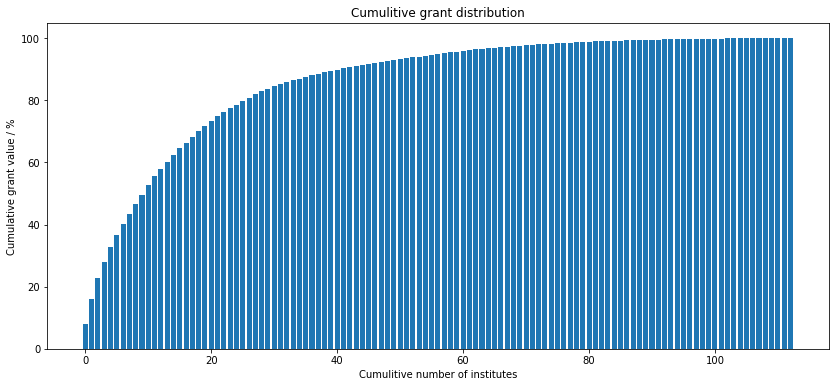

In [8]:
plt.figure(figsize=(14, 6))
plt.bar(np.arange(0, len(model_data.index)), model_data['Amount'].sort_values(ascending=False).cumsum()/total*100)
plt.ylabel("Cumulative grant value / %")
plt.xlabel("Cumulitive number of institutes")
plt.title("Cumulitive grant distribution")

# Has a clearly exponential relationship, could be exploited using log + linear regression

In [9]:
model_data.corr()

Overall score  Entry standards  \
Overall score                       1.000000         0.830395   
Entry standards                     0.830395         1.000000   
Student satisfaction               -0.048085        -0.025228   
Research quality                    0.791632         0.661894   
Research intensity                  0.786027         0.662392   
Academic services spend             0.464568         0.375319   
Facilities spend                    0.309395         0.044269   
Degree completion                   0.860164         0.687244   
Student -staff ratio               -0.739297        -0.517294   
Graduate prospects – outcomes       0.778188         0.699312   
Graduate prospects – on track       0.637087         0.539226   
Amount                              0.692222         0.634056   

                               Student satisfaction  Research quality  \
Overall score                             -0.048085          0.791632   
Entry standards                           -0.025228          0.661894   
Student satisfaction                       1.000000         -0.344004   
Research quality                          -0.344004          1.000000   
Research intensity                        -0.244334          0.753589   
Academic services spend                   -0.182484          0.398224   
Facilities spend                           0.061939          0.120818   
Degree completion                         -0.103081          0.643021   
Student -staff ratio                       0.076510         -0.543658   
Graduate prospects – outcomes             -0.225550          0.659321   
Graduate prospects – on track             -0.150424          0.430653   
Amount                                    -0.210969          0.578435   

                               Research intensity  Academic services spend  \
Overall score                            0.786027                 0.464568   
Entry standards                          0.662392                 0.375319   
Student satisfaction                    -0.244334                -0.182484   
Research quality                         0.753589                 0.398224   
Research intensity                       1.000000                 0.320625   
Academic services spend                  0.320625                 1.000000   
Facilities spend                         0.255144                 0.028073   
Degree completion                        0.667069                 0.273375   
Student -staff ratio                    -0.526707                -0.464846   
Graduate prospects – outcomes            0.663537                 0.286751   
Graduate prospects – on track            0.470625                 0.199192   
Amount                                   0.598534                 0.484833   

                               Facilities spend  Degree completion  \
Overall score                          0.309395           0.860164   
Entry standards                        0.044269           0.687244   
Student satisfaction                   0.061939          -0.103081   
Research quality                       0.120818           0.643021   
Research intensity                     0.255144           0.667069   
Academic services spend                0.028073           0.273375   
Facilities spend                       1.000000           0.202390   
Degree completion                      0.202390           1.000000   
Student -staff ratio                  -0.129627          -0.625222   
Graduate prospects – outcomes          0.173368           0.708796   
Graduate prospects – on track          0.276751           0.624710   
Amount                                 0.050622           0.592201   

                               Student -staff ratio  \
Overall score                             -0.739297   
Entry standards                           -0.517294   
Student satisfaction                       0.076510   
Research quality                          -0.543658   
Research intensity                

<AxesSubplot:>

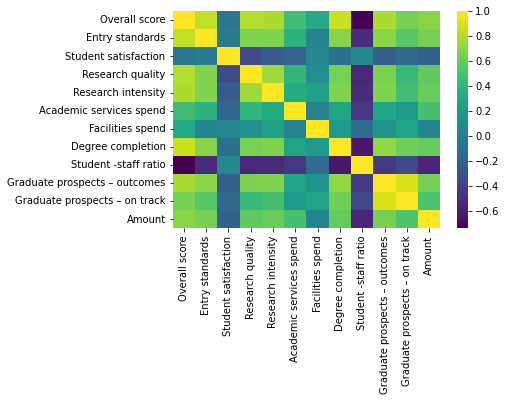

In [10]:
sns.heatmap(model_data.corr(), cmap="viridis")

In [11]:
model_data.describe().transpose()

count          mean           std       min  \
Overall score                  113.0  6.209469e+02  1.405445e+02    304.00   
Entry standards                113.0  1.343274e+02  2.679800e+01     95.00   
Student satisfaction           113.0  4.026168e+00  9.300077e-02      3.72   
Research quality               113.0  2.730442e+00  3.941387e-01      1.40   
Research intensity             113.0  4.950442e-01  2.791445e-01      0.08   
Academic services spend        113.0  1.749690e+03  4.289448e+02    884.00   
Facilities spend               113.0  6.933805e+02  2.781958e+02    189.00   
Degree completion              113.0  8.556549e+01  7.217548e+00     53.10   
Student -staff ratio           113.0  1.592124e+01  2.752286e+00     10.10   
Graduate prospects – outcomes  113.0  7.201770e+01  9.008361e+00     53.10   
Graduate prospects – on track  113.0  7.669115e+01  5.157580e+00     60.50   
Amount                         113.0  2.995477e+07  5.192786e+07  26623.80   

                                      25%         50%          75%  \
Overall score                      521.00      599.00       715.00   
Entry standards                    115.00      126.00       149.00   
Student satisfaction                 3.97        4.03         4.07   
Research quality                     2.51        2.74         3.06   
Research intensity                   0.24        0.39         0.78   
Academic services spend           1448.00     1729.00      2011.00   
Facilities spend                   505.00      683.00       808.00   
Degree completion                   81.00       85.00        91.30   
Student -staff ratio                14.20       15.50        17.30   
Graduate prospects – outcomes       66.00       71.00        79.00   
Graduate prospects – on track       73.60       77.00        80.00   
Amount                         2397769.16  9099444.15  34000459.19   

                                        max  
Overall score                  1.000000e+03  
Entry standards                2.080000e+02  
Student satisfaction           4.300000e+00  
Research quality               3.360000e+00  
Research intensity             9.500000e-01  
Academic services spend        2.982000e+03  
Facilities spend               1.939000e+03  
Degree completion              9.910000e+01  
Student -staff ratio           2.350000e+01  
Graduate prospects – outcomes  9.510000e+01  
Graduate prospects – on track  9.000000e+01  
Amount                         2.734851e+08

## Overall score shows the strongest correlation with amount, with student satisfaction and facilities spend being the least correlated. 
- Student satisfaction has a very low standard deviation over the dataset, implying that student satisfaction is independent of institution. 
- Facilities spend on the other hand had a large range, but the lowest correlation.
- Both have a fairly normal distribution around their means, suggesting no underlying trends with Amount.

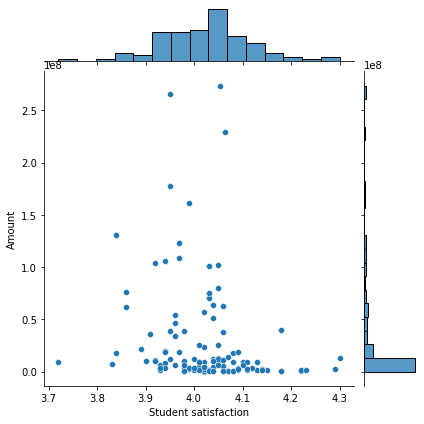

In [12]:
sns.jointplot(x=model_data["Student satisfaction"], y=model_data["Amount"])

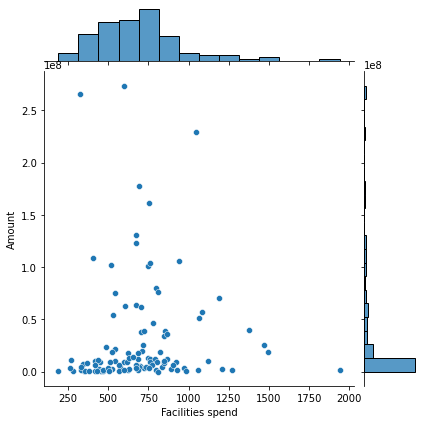

In [13]:
sns.jointplot(x=model_data["Facilities spend"], y=model_data["Amount"])

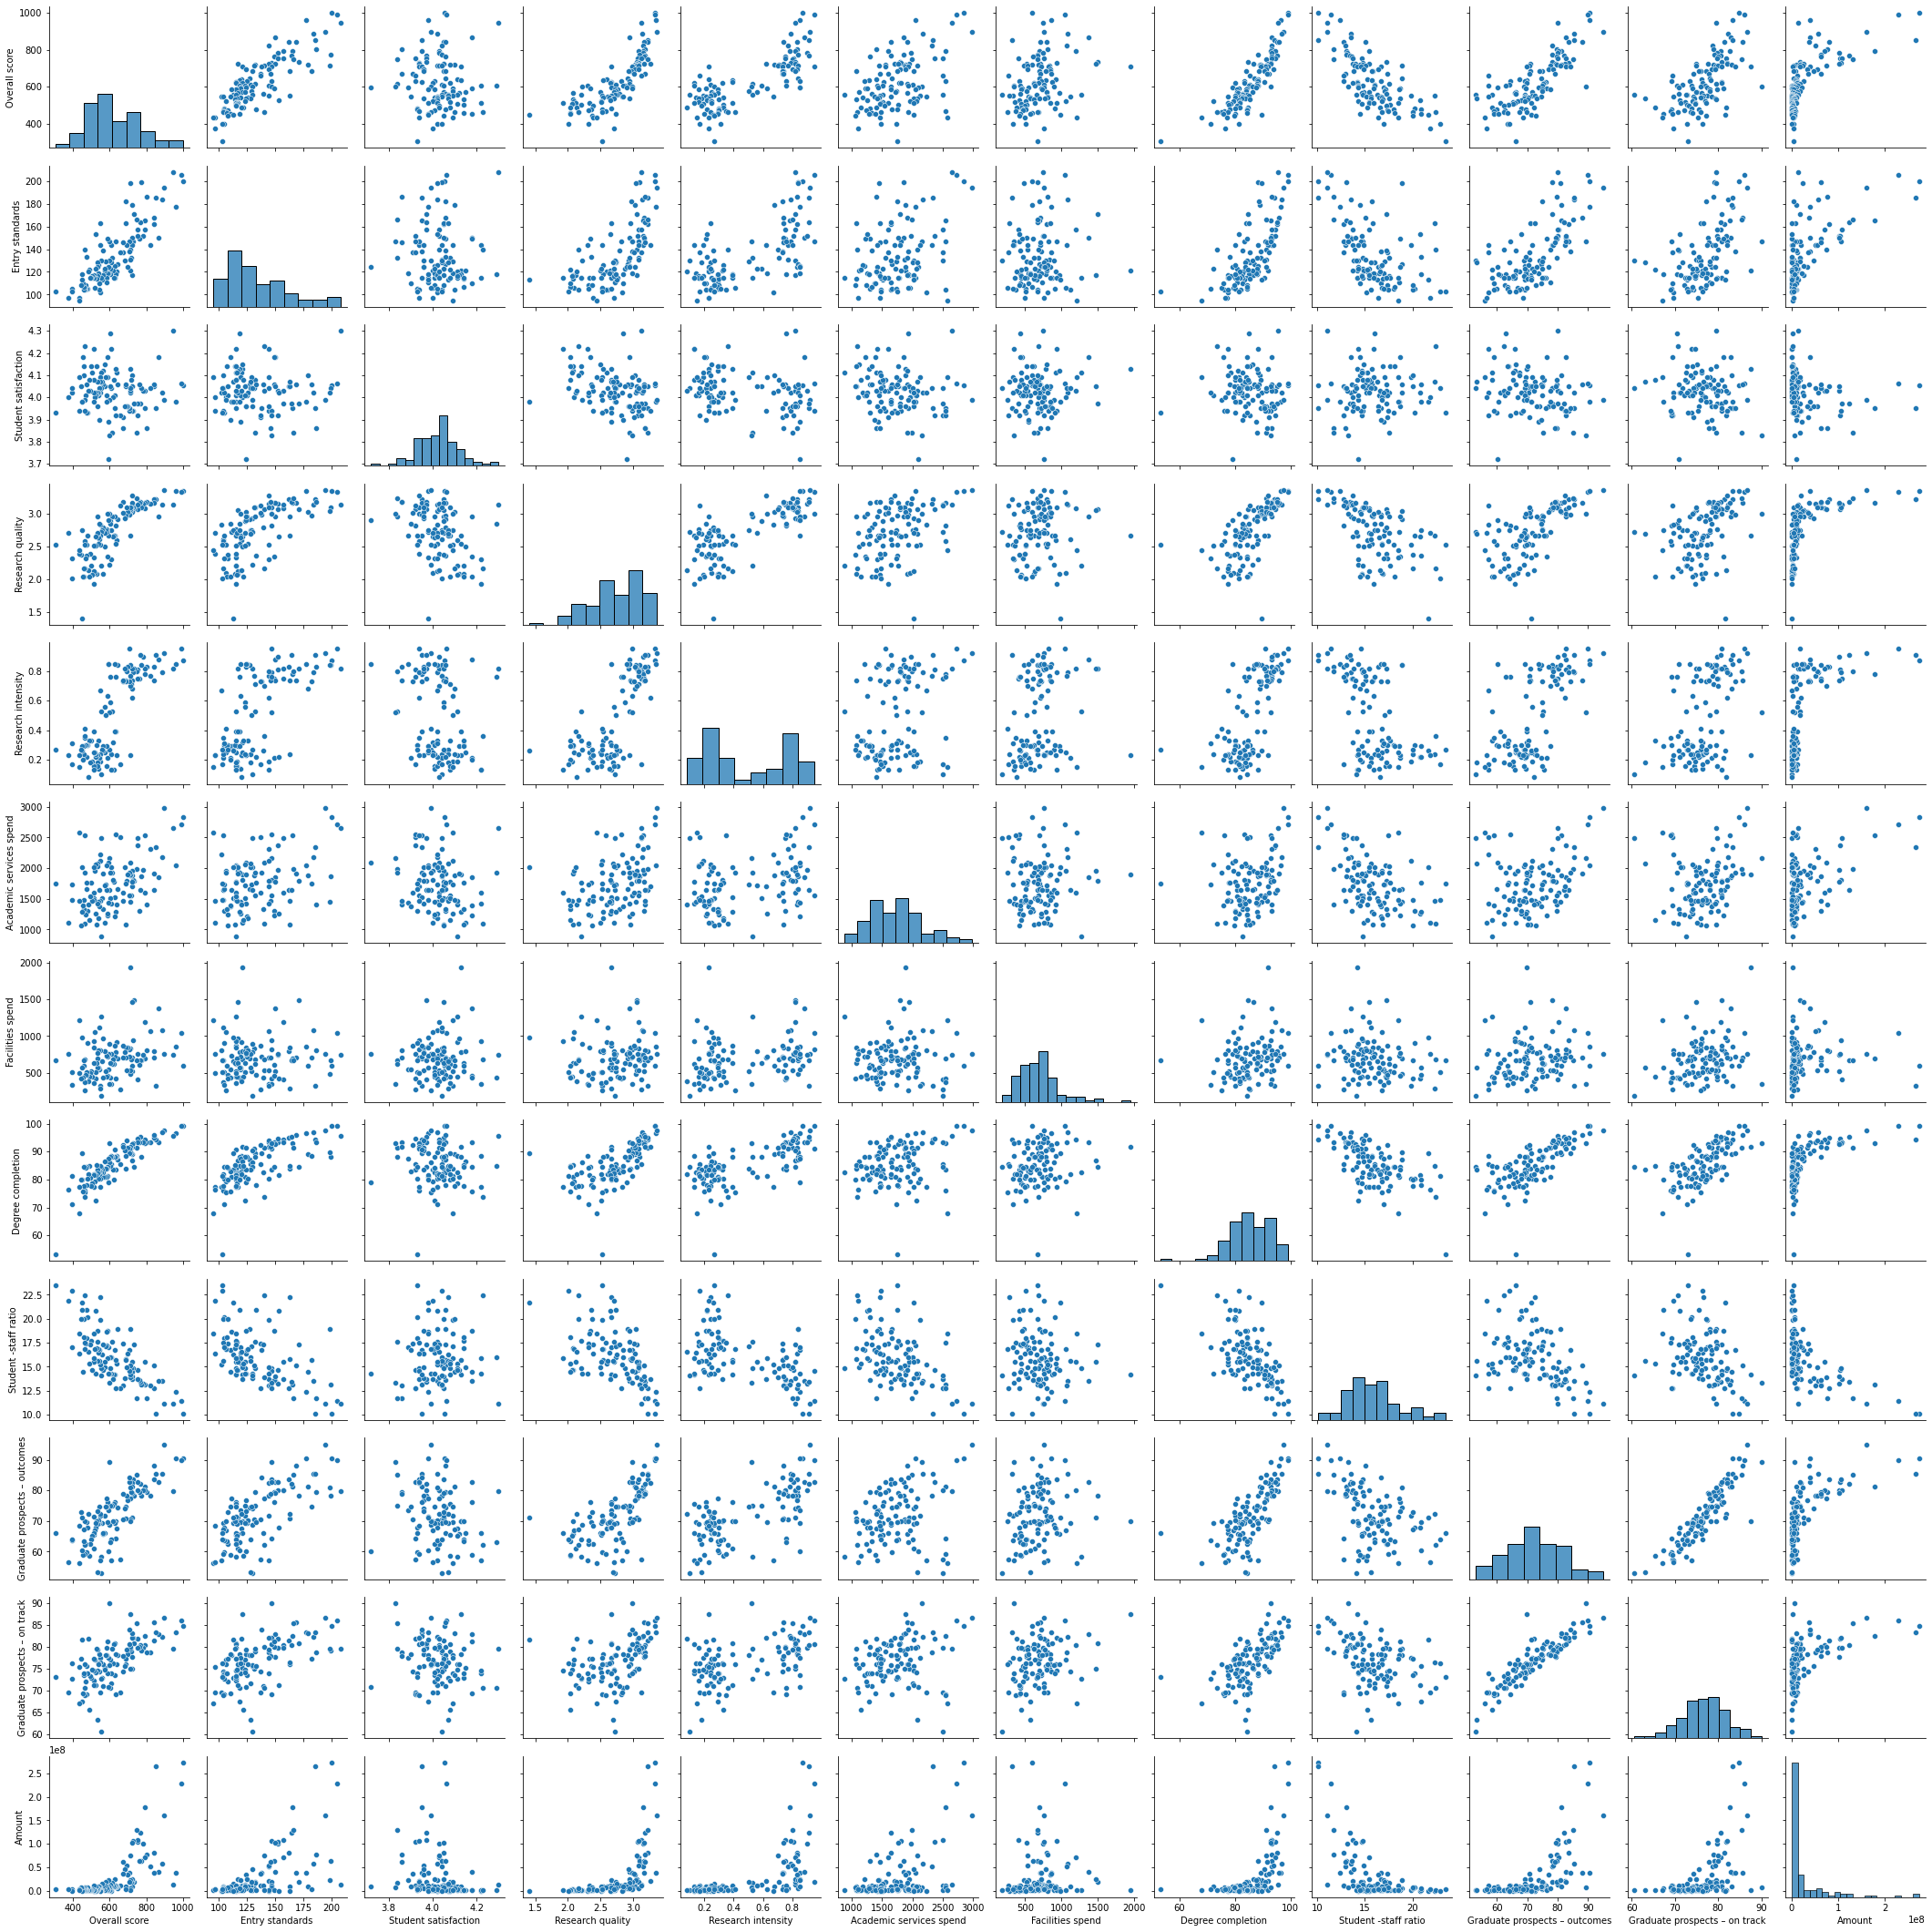

In [14]:
sns.pairplot(model_data)

# Since overall score has the highest correlation and is a an aggregation of all the other features, a basic model would be linear regression with only the score and amount

- Taking the log of the amount produces a nicer gaussian distribution in Amount which will provide more reasonable fits for the linear regression.

<AxesSubplot:xlabel='Amount', ylabel='Count'>

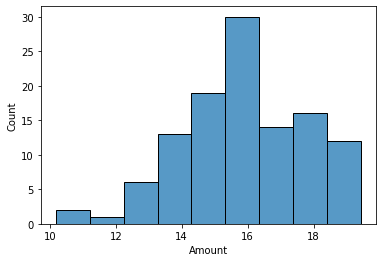

In [15]:
sns.histplot(np.log(model_data["Amount"]))

<AxesSubplot:xlabel='Overall score', ylabel='Amount'>

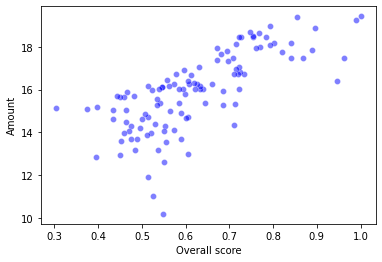

In [16]:
sns.scatterplot(x=model_data["Overall score"]/1000, y=np.log(model_data["Amount"]), color="b", alpha=0.5)

# Linear regression using ElasticNet
- Elastic net was chosen due to strong multicollinearity in the data set (see correlation table). 
- A ridge regression was not used as I suspect that some features (e.g. student satisfaction) could be eliminated.
- log("Amount") was used to allow for linear regression to be used.

N.B. With 2D data as in the first model a simple linear regression could be used, but ElasticNet was used for consistency.

In [17]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(model_data["Overall score"], np.log(model_data["Amount"]), test_size=0.2, random_state=0)

lin_EN = ElasticNetCV(cv=5, random_state=0, n_alphas=50)
lin_EN.fit(X_train_lin.values.reshape(-1, 1), y_train_lin)

print("R2 test score =", lin_EN.score(X_test_lin.values.reshape(-1, 1), y_test_lin))
print("MSE test value = ", mean_squared_error(lin_EN.predict(X_test_lin.values.reshape(-1, 1)), y_test_lin))
print("MSE final train value =", np.mean(lin_EN.mse_path_, axis=1)[-1])

R2 test score = 0.6699829208555639
MSE test value =  1.130851928183498
MSE final train value = 1.7579898886242507


Text(0.5, 1.0, 'MSE vs iteration')

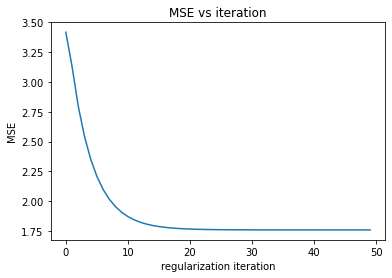

In [19]:
sns.lineplot(x=np.arange(0,len(lin_EN.mse_path_)), y=(np.mean(lin_EN.mse_path_, axis=1)))
plt.xlabel("regularization iteration")
plt.ylabel("MSE")
plt.title("MSE vs iteration")

Text(0.5, 1.0, 'Pred vs Test')

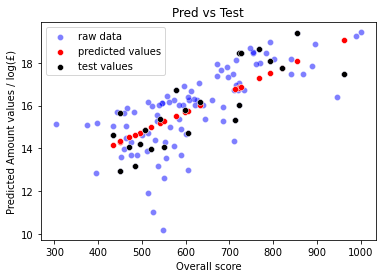

In [20]:
sns.scatterplot(x=model_data["Overall score"], y=np.log(model_data["Amount"]), color="b", alpha=0.5, label="raw data")
sns.scatterplot(x=X_test_lin, y= lin_EN.predict(X_test_lin.values.reshape(-1, 1)), color="r", label="predicted values")
sns.scatterplot(x=X_test_lin, y=y_test_lin, color="k", label="test values")
plt.xlabel("Overall score")
plt.ylabel("Predicted Amount values / log(£)")
plt.title("Pred vs Test")

- Since the data is 2D, no parameter optimisation is needed beyond alpha.
- The results suggest that a significant model can be made, and that there is no overfitting.
- Can a more complex model provide better results?

# Does including all features improve the model?

In [21]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(model_data.drop(["Amount"], axis=1), np.log(model_data["Amount"]), test_size=0.2, random_state=0)

l1_ratio=[.01, .1, .5, .7, .9, .95, .99, 1]

lin_ENfeat = ElasticNetCV(cv=5, random_state=0, n_alphas=1000, l1_ratio=l1_ratio, eps=1e-3)
lin_ENfeat.fit(X_train_feat, y_train_feat)

print("R2 =", lin_ENfeat.score(X_test_feat, y_test_feat))
print("MSE test score =", mean_squared_error(y_test_feat, lin_ENfeat.predict(X_test_feat)))
print("MSE train score =", np.mean(np.mean(lin_ENfeat.mse_path_, axis=1), axis=1))

R2 = 0.5890819066709618
MSE test score = 1.4080711197472693
MSE train score = [2.23830911 2.15193097 2.13616893 2.13488121 2.13415446 2.13401964
 2.13392145 2.13389809]


Text(0.5, 1.0, 'MSE vs iteration for different l1 ratios')

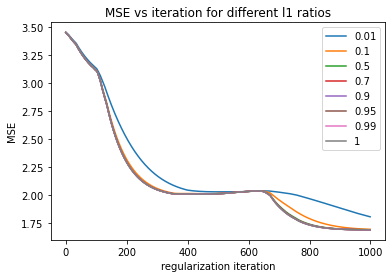

In [38]:
for l1_num, l1_results in enumerate(lin_ENfeat.mse_path_):
    sns.lineplot(x=np.arange(0,len(l1_results)), y=(np.mean(l1_results, axis=1)), label=l1_ratio[l1_num])
plt.xlabel("regularization iteration")
plt.ylabel("MSE")
plt.title("MSE vs iteration for different l1 ratios")

Text(0.5, 1.0, 'Pred vs Test')

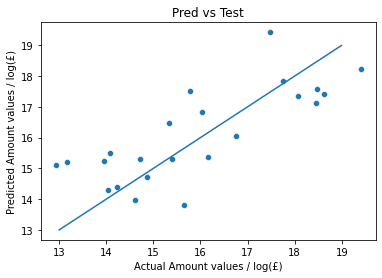

In [23]:
plt.plot(np.arange(13,19,0.01), np.arange(13,19,0.01))
sns.scatterplot(x=y_test_feat, y=lin_ENfeat.predict(X_test_feat))
plt.xlabel("Actual Amount values / log(£)")
plt.ylabel("Predicted Amount values / log(£)")
plt.title("Pred vs Test")

## This results in a slightly better model when using log(Amount), however if the returned values are converted back to a pound value (use exponent) then the model using all features and the log of the target has a larger error than when just the overall score is used.

In [24]:
print("r2 and MSE for log(Amount) models")
print("MSE 1 feature :", mean_squared_error(y_test_lin, lin_EN.predict(X_test_lin.values.reshape(-1, 1))))
print("R2 1 feature", r2_score(y_test_lin, lin_EN.predict(X_test_lin.values.reshape(-1, 1))))
print("MSE all features :", mean_squared_error(y_test_feat, lin_ENfeat.predict(X_test_feat)))
print("R2 all features", r2_score(y_test_feat, lin_ENfeat.predict(X_test_feat)))

r2 and MSE for log(Amount) models
MSE 1 feature : 1.130851928183498
R2 1 feature 0.6699829208555639
MSE all features : 1.4080711197472693
R2 all features 0.5890819066709618


In [25]:
print("r2 and MSE for exp(log(Amount)) models")
print("MSE 1 feature :", format(mean_squared_error(np.exp(y_test_lin), np.exp(lin_EN.predict(X_test_lin.values.reshape(-1, 1)))), '.1E'))
print("R2 1 feature", r2_score(np.exp(y_test_lin), np.exp(lin_EN.predict(X_test_lin.values.reshape(-1, 1)))))
print("MSE all features :", format(mean_squared_error(np.exp(y_test_feat), np.exp(lin_ENfeat.predict(X_test_feat))), '.1E'))
print("R2 all features", r2_score(np.exp(y_test_feat), np.exp(lin_ENfeat.predict(X_test_feat))))

r2 and MSE for exp(log(Amount)) models
MSE 1 feature : 3.7E+15
R2 1 feature 0.022296716973354225
MSE all features : 4.7E+15
R2 all features -0.23935269846859497


# Final regression model using SVR with RBF kernel
- Training a model directly on the raw amount data is preferable to avoid this issue. As such, SVC regression was used in confunction with radial basis functions to fit the un-transformed data.
- Grid search used to optimize the values for C and $\epsilon$
- Scaled data is needed for this so a pipeline is used.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [27]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(["Amount"], axis=1), model_data["Amount"], test_size=0.2, random_state=40)

parameters = {'svr__kernel':(['rbf']), 'svr__gamma': (['scale']), 'svr__C':[0.1, 1, 10, 100, 1000], 'svr__epsilon':[100, 10, 1, 0.1, 0.01]}
#change gamma to scale

svr = SVR()
scaler = StandardScaler()
pipe = Pipeline([("scaler", scaler), ("svr", svr)])

search = GridSearchCV(pipe, parameters, cv=2)
search.fit(X_train, y_train)
print(search.best_params_)
print("r2", r2_score(y_test, search.predict(X_test)))
print("MSE", format(mean_squared_error(y_test, search.predict(X_test)), '.1E'))

{'svr__C': 1000, 'svr__epsilon': 100, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
r2 -0.2829307124286562
MSE 2.3E+15


Text(0.5, 1.0, 'Pred vs Test')

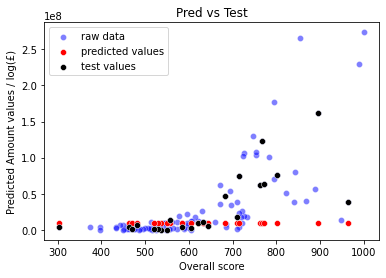

In [28]:
sns.scatterplot(x=model_data["Overall score"], y=(model_data["Amount"]), color="b", alpha=0.5, label="raw data")
sns.scatterplot(x=X_test["Overall score"], y= search.predict(X_test), color="r", label="predicted values")
sns.scatterplot(x=X_test["Overall score"], y=y_test, color="k", label="test values")
plt.xlabel("Overall score")
plt.ylabel("Predicted Amount values / log(£)")
plt.title("Pred vs Test")

Text(0.5, 1.0, 'Pred vs Test')

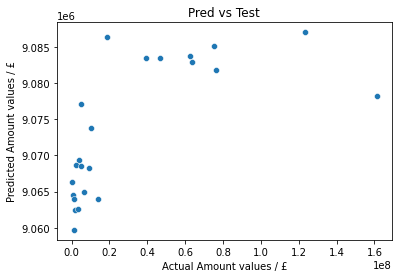

In [29]:
#plt.plot(np.arange(0, 1e7, 1e4), np.arange(0, 1e7, 1e4))
sns.scatterplot(x=y_test, y=search.predict(X_test))
plt.xlabel("Actual Amount values / £")
plt.ylabel("Predicted Amount values / £")
plt.title("Pred vs Test")

- It performs poorly with both hyperparameters tending upwards.
- With $\epsilon$ being so high it is trying not to penalise any data points.
- Final model appears to be an almost flat value prediction for any given parameters, with varyiation in the 3rd significant figure despite the dataset spanning several orders of magnitude.
- Poor model choice, likely due to noisy data with a non-linear relationship.

# Random forest regression
- Random forests are a good alternative as they can perform linear regression on an unscaled dataset.
- The main drawback is they are very poor at extrapolation, however for this data set it is unlikely that a new university that you wanted to predict funding for would be outsite the current range.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

In [31]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(["Amount"], axis=1), model_data["Amount"], test_size=0.2, random_state=40)

forest_regr = RandomForestRegressor(n_estimators=25,
                                    max_depth=2, 
                                    min_samples_split=2)

forest_regr.fit(X_train, y_train)

print("r2 test", r2_score(forest_regr.predict(X_test), y_test))
print("r2 train", r2_score(forest_regr.predict(X_train), y_train))
print("MSE test", mean_squared_error(forest_regr.predict(X_test), y_test))
print("MSE train", mean_squared_error(forest_regr.predict(X_train), y_train))

r2 test 0.7201305434966744
r2 train 0.7294809841686116
MSE test 597675257666315.1
MSE train 475993331595102.3


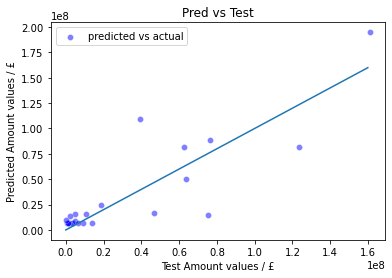

In [32]:
sns.scatterplot(x=y_test, y=forest_regr.predict(X_test), color="b", alpha=0.5, label="predicted vs actual")
plt.plot(np.arange(0,1.6e8, 1e5), np.arange(0,1.6e8, 1e5))
plt.xlabel("Test Amount values / £")
plt.ylabel("Predicted Amount values / £")
plt.title("Pred vs Test")
plt.legend()

It seems to perform very well, easily beating out the linear regression models, and it seems unlikely to be overfitting given the train and test R2 scores are the same, however some parameter tuning is still necessary.

# Using a gridsearch to optimized the forest and prevent overfitting


In [33]:
parameters = {"n_estimators": [10, 25, 50, 75, 100, 125], "max_depth": [1,2,3,4,5,6,7,8,9], "min_samples_split": [2,3,4,5], "min_samples_leaf": [1,2,3,4,5,6]}

regr = RandomForestRegressor()
grid_regr = GridSearchCV(regr, parameters, cv=5)
grid_regr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 25, 50, 75, 100, 125]})

In [34]:
print(grid_regr.best_params_)
print("r2 test :", grid_regr.score(X_test, y_test))
print("r2 train :", grid_regr.score(X_train, y_train))

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
0.5113925206532943
0.9324792016795899


In [40]:
forest_regr = RandomForestRegressor(n_estimators=10,
                                    max_depth=8, 
                                    min_samples_split=3,
                                    min_samples_leaf=1)

forest_regr.fit(X_train, y_train)

print("r2 test :", r2_score(forest_regr.predict(X_test), y_test))
print("r2 train :", r2_score(forest_regr.predict(X_train), y_train))
print("MSE test :", mean_squared_error(forest_regr.predict(X_test), y_test))
print("MSE train :", mean_squared_error(forest_regr.predict(X_train), y_train))

r2 test : 0.7394697638101138
r2 train : 0.8893858787103363
MSE test : 945056703206409.2
MSE train : 276875372373278.2


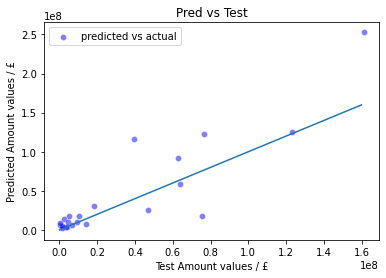

In [41]:
sns.scatterplot(x=y_test, y=forest_regr.predict(X_test), color="b", alpha=0.5, label="predicted vs actual")
plt.plot(np.arange(0,1.6e8, 1e5), np.arange(0,1.6e8, 1e5))
plt.xlabel("Test Amount values / £")
plt.ylabel("Predicted Amount values / £")
plt.title("Pred vs Test")
plt.legend()

# Summary

- Linear regression using the log("Amount") vales provides a quick and simple approximation, with a reasonable $R^2=0.67$.
- Including all the features did not improve the model's results
- When trying to predeict the actual values by taking the exponent on the results (exp(log(predicted amount)) these results are worsened significantly.
- Due to the small dataset size these results are very dependent on the train/test splitting. A single entry at the top end of the "Amount" feature can significantly change the results leading to a different conclusion.

- Support Vector Regression was used with a rbf kernel to try and use the raw "Amount" values. A working model could not be found through hyperparameter fitting, likely due to the inherent noise in the data.
- Finally a Random Forest Regression model was optimized using a grid search. This proved to be the best model out of those discussed here, with $R^2=0.73$, better than the single feature regression on log("Amount"), and with a significantly smaller MSE ($3.7e^{14}$ vs $9.4e^{14}$).
- Again, despite using cross validation, the small dataset size and range of expected results (spanning > 4 orders of magnitude) creates quite sensitive models. Running the random forest multiple times and averaging the results might provide the best solution, despite it already being an ensemble.
## Improvements
- From the available data it is likey impossible to create a highly accurate model as there are many other factors that go into the governments grant making, such as long term research stratergies, specific investment in under-performing institutions.
- A better model might include institute size, location, existing research infrastructure and historic funding, if available.